***Global id - Barot1n , Sagga2r , pored2n***
# EDA on GlobalData Science salaries Dataset

# Introduction:

In today's evolving job market, salary distribution is influenced by various factors, including experience level, work mode, company size, geographic location, job role, and industry demand. Understanding these factors can help businesses make informed compensation decisions and allow professionals to navigate their career paths more effectively. This study explores multiple hypotheses related to salary trends in data-related roles, using visualizations to identify key patterns and insights.<br>

By analyzing salary variations across experience levels, work environments (onsite, online, and hybrid), company sizes, continents, job roles, and time trends, we aim to uncover the driving forces behind compensation differences. The findings from these hypotheses will provide valuable insights into the dynamics of salary structures and market trends.

# Dataset: GlobalDataScienceSalaries
The dataset contains the following columns:

- ***work_year:*** This column indicates the year in which the salary data was collected. It helps to track salary trends over time and is useful for analyzing year-over-year changes in salary distributions in the data science field.It Helps in identifying salary trends across different years, as well as understanding how the data science job market has evolved over time.
- ***experience_level:*** It will describes the level of experience of an employee such as Entry-level, Mid-level, Senior-level.This column allows us to assess how salary changes with increasing experience and helps to segment salary analysis based on experience levels.
- ***employment_type:*** This column indicates the type of employment (full-time, part-time) an employee holds. It is used to differentiate salary trends based on the employment status of the employee.
- ***job_title:*** The specific job title of the employee (e.g., Data Scientist, Data Analyst,Software Engineer,Machine Learning Engineer).It will useful for Understanding how salaries differ across job titles can help professionals and employers make data-driven decisions about career progression and compensation.
- ***salary_in_usd:*** The salary of an employee in USD.It is the target variable in the analysis, as the goal is to explore how different factors (such as experience level, job title, company size, etc.) influence the salary.
- ***salary_currency:*** This column helps to standardize salary data. It provides context for understanding the local economic conditions.
- ***remote_ratio:*** The ratio of remote work for an employee such as Fully remote, Partially remote, On-site.It helps to analyze whether employees who work remotely earn more or less compared to those working on-site.
- ***employee_country:*** The country of the employee.
- ***company_size:*** The size of the company(Small, Medium, Large).Helps to analyze how company size correlates with salary levels, as larger organizations may have more resources to offer higher salaries.
- ***company_location:*** The location of the company (country or region).It helps to understanding company location can help assess regional salary differences and the economic conditions that influence salary scales in various countries.
- ***zscore_salaryUSD:*** This is the Z-score of the salary, which measures how many standard deviations a given salary is from the mean salary. It is used for identifying outliers in salary distribution.
- ***job_title:*** The specific job title of the employee (e.g., Data Scientist, Data Analyst,Software Engineer,Machine Learning Engineer).It helps to understanding how salaries differ across job titles can help professionals and employers make data-driven decisions about career progression and compensation.

In [15]:
import pandas as pd

df = pd.read_csv('GlobalDataScienceSalaries.csv')
df.head()

# Calculate the total number of rows in the DataFrame
total_rows=len(df)
# Print the total number of rows in the dataset
print("The total number of rows in the dataset :" ,total_rows)


The total number of rows in the dataset : 65697


In [17]:
# Count null values in each column
null_counts = df.isnull().sum()
print("Null values per column:")
print(null_counts)

# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Check for duplicate values in a specific column
duplicate_counts = df['work_year'].value_counts()
print("Duplicate values and their counts:")
print(duplicate_counts)

Null values per column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
employee_country      0
company_country       0
currency_name         0
zscore_salaryUSD      0
dtype: int64
Number of duplicate rows: 35250
Duplicate values and their counts:
work_year
2024    55096
2023     8659
2022     1655
2021      214
2020       73
Name: count, dtype: int64


In [19]:
# Extract the first row data
first_row = df.iloc[0]
print("First Row:")
print(first_row)

First Row:
work_year                          2024
experience_level                     EN
employment_type                      FT
job_title                  Data Analyst
salary_in_usd                   75708.0
salary_currency                     AUD
employee_residence                   AU
remote_ratio                    On-site
company_location                     AU
company_size                          M
employee_country              Australia
company_country               Australia
currency_name         Australian dollar
zscore_salaryUSD              -0.098467
Name: 0, dtype: object


In [21]:
# Check for duplicates of the first row against the data values present in the other rows if it exactly matches 
duplicates_of_first_row = df[df.duplicated(keep=False) & (df == first_row).all(axis=1)]
print("Rows that are duplicates of the first row:")
print(duplicates_of_first_row)

Rows that are duplicates of the first row:
   work_year experience_level employment_type     job_title  salary_in_usd  \
0       2024               EN              FT  Data Analyst        75708.0   
1       2024               EN              FT  Data Analyst        75708.0   

  salary_currency employee_residence remote_ratio company_location  \
0             AUD                 AU      On-site               AU   
1             AUD                 AU      On-site               AU   

  company_size employee_country company_country      currency_name  \
0            M        Australia       Australia  Australian dollar   
1            M        Australia       Australia  Australian dollar   

   zscore_salaryUSD  
0         -0.098467  
1         -0.098467  


In [23]:
# Counting the number of duplicates of the first row 
num_duplicates = len(duplicates_of_first_row)
print(f"Number of rows that are duplicates of the first row: {num_duplicates}")

Number of rows that are duplicates of the first row: 2


***Note : Till here we were checking for the first 2 rows only to understand if our logic to check duplicates against all other data values in the rows is matching and confirming the values are present in other rows.***

***Now we are extracting the indentifying duplicates in the full data set containing rows 65697***

In [26]:
# Extract all the rows till 65697 
first_10_rows = df.iloc[:65697]
print(" extracting all  Rows:")
print(first_10_rows)

 extracting all  Rows:
       work_year experience_level employment_type  \
0           2024               EN              FT   
1           2024               EN              FT   
2           2024               EN              FT   
3           2024               MI              FT   
4           2024               MI              FT   
...          ...              ...             ...   
65692       2024               EN              FT   
65693       2024               SE              FT   
65694       2024               SE              FT   
65695       2024               SE              FT   
65696       2023               MI              FT   

                                job_title  salary_in_usd salary_currency  \
0                            Data Analyst       75708.00             AUD   
1                            Data Analyst       75708.00             AUD   
2                            Data Analyst       68618.00             AUD   
3                          Data Scie

In [28]:
# # Check for duplicates of each row in all the cooumns - we can comment this code is not required.
# for index, row in first_10_rows.iterrows():
#     # Find rows that match the current row
#     duplicates = df[df.apply(lambda x: x.equals(row), axis=1)]
    
#     # Print the results
#     if len(duplicates) > 1:
#         print(f"Row {index} has duplicates:")
#         print(duplicates)
#     else:
#         print(f"Row {index} has no duplicates.")

In [30]:
# total_duplicate_count = 0  # Initialize a variable to store the total duplicate count

# # Count the number of duplicates against each row through out the data set.
# for index, row in first_10_rows.iterrows():
#     num_duplicates = df[df.apply(lambda x: x.equals(row), axis=1)].shape[0]
#     duplicate_count = num_duplicates - 1  # Subtract 1 to exclude the original row
#     total_duplicate_count += duplicate_count  # Add to the total duplicate count
#     print(f"Row {index} has {duplicate_count} duplicates.")

# print(f"Total duplicate count in the rows of the data set: {total_duplicate_count}")

In [32]:
# Identify all duplicate rows (including the first occurrence)
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

# Count the total number of duplicate rows
total_duplicate_count = len(duplicate_rows)



# total_duplicate_count = len(duplicate_rows) - df.drop_duplicates().shape[0]

# print(f"Total count of duplicate rows: {total_duplicate_count}")

       work_year experience_level employment_type                  job_title  \
0           2024               EN              FT               Data Analyst   
1           2024               EN              FT               Data Analyst   
6           2023               SE              FT  Machine Learning Engineer   
17          2023               SE              FT  Machine Learning Engineer   
20          2024               SE              FT          Software Engineer   
...          ...              ...             ...                        ...   
65687       2024               SE              FT         Analytics Engineer   
65688       2024               MI              FT               Data Analyst   
65689       2024               MI              FT        Engineering Manager   
65690       2024               MI              FT             Data Scientist   
65691       2023               SE              FT              Data Engineer   

       salary_in_usd salary_currency em

In [34]:
# Drop the duplicate rows from the original DataFrame
df_no_duplicates = df.drop(duplicate_rows.index)
print(df_no_duplicates)

       work_year experience_level employment_type  \
2           2024               EN              FT   
3           2024               MI              FT   
4           2024               MI              FT   
5           2024               MI              FT   
7           2023               MI              FT   
...          ...              ...             ...   
65692       2024               EN              FT   
65693       2024               SE              FT   
65694       2024               SE              FT   
65695       2024               SE              FT   
65696       2023               MI              FT   

                                job_title  salary_in_usd salary_currency  \
2                            Data Analyst       68618.00             AUD   
3                          Data Scientist       73333.00             AUD   
4                          Data Scientist       52000.00             AUD   
5               Machine Learning Engineer       80000.00   

In [36]:
# Save the new DataFrame to a CSV file
df_no_duplicates.to_csv('new_dataframe.csv', index=False)

print("New DataFrame saved to 'new_dataframe.csv'")

New DataFrame saved to 'new_dataframe.csv'


In [38]:
df_no_duplicates.to_csv('new_dataframe.csv', index=False)

In [40]:
df1 = pd.read_csv('new_dataframe.csv')
print(df1)

num_duplicates = df1.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


       work_year experience_level employment_type  \
0           2024               EN              FT   
1           2024               MI              FT   
2           2024               MI              FT   
3           2024               MI              FT   
4           2023               MI              FT   
...          ...              ...             ...   
20278       2024               EN              FT   
20279       2024               SE              FT   
20280       2024               SE              FT   
20281       2024               SE              FT   
20282       2023               MI              FT   

                                job_title  salary_in_usd salary_currency  \
0                            Data Analyst       68618.00             AUD   
1                          Data Scientist       73333.00             AUD   
2                          Data Scientist       52000.00             AUD   
3               Machine Learning Engineer       80000.00   

In [42]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,salary_currency,employee_residence,remote_ratio,company_location,company_size,employee_country,company_country,currency_name,zscore_salaryUSD
0,2024,EN,FT,Data Analyst,68618.0,AUD,AU,On-site,AU,M,Australia,Australia,Australian dollar,-0.384297
1,2024,MI,FT,Data Scientist,73333.0,AUD,AU,On-site,AU,M,Australia,Australia,Australian dollar,-0.194214
2,2024,MI,FT,Data Scientist,52000.0,AUD,AU,On-site,AU,M,Australia,Australia,Australian dollar,-1.054244
3,2024,MI,FT,Machine Learning Engineer,80000.0,AUD,AU,Hybrid,AU,L,Australia,Australia,Australian dollar,0.074563
4,2023,MI,FT,AI Scientist,81838.0,AUD,AU,Online,AU,L,Australia,Australia,Australian dollar,0.148661


# Hypothesis 1 : Employees with more experience (Executive Level, Senior level) earn higher salaries compared to Entry and Mid-level employees.
***Solution:*** We will plot a bar chart to visualize the relationship between experience level and salary.

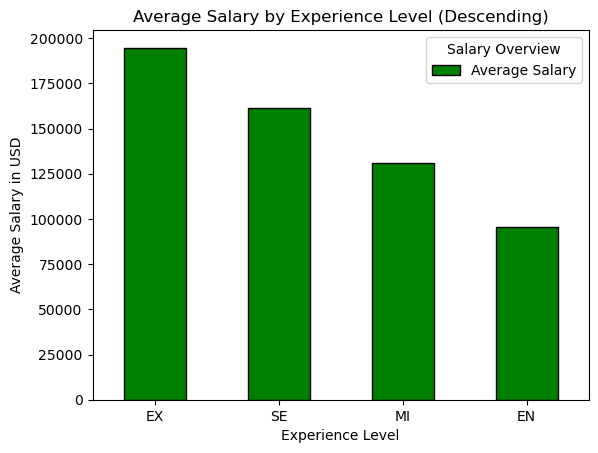

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('new_dataframe.csv')


avg_salary = df.groupby('experience_level')['salary_in_usd'].mean()
avg_salary_sorted = avg_salary.sort_values(ascending=False)
ax = avg_salary_sorted.plot(kind='bar', color='green', edgecolor='black', label='Average Salary')
plt.title('Average Salary by Experience Level (Descending)')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.legend(title='Salary Overview')
plt.xticks(rotation=0)
plt.show()

    EX: Executive Level
    SE: Senior Level
    MI: Mid Level
    EN: Entry Level


# Hypothesis 2 : Employees working onsite or online roles earn higher salaries than those working hybrid.
***Solution:*** We will plot a  horizontal  bar chart to visualize the relationship between (onsite,online,hybrid roles Vs Salaries)

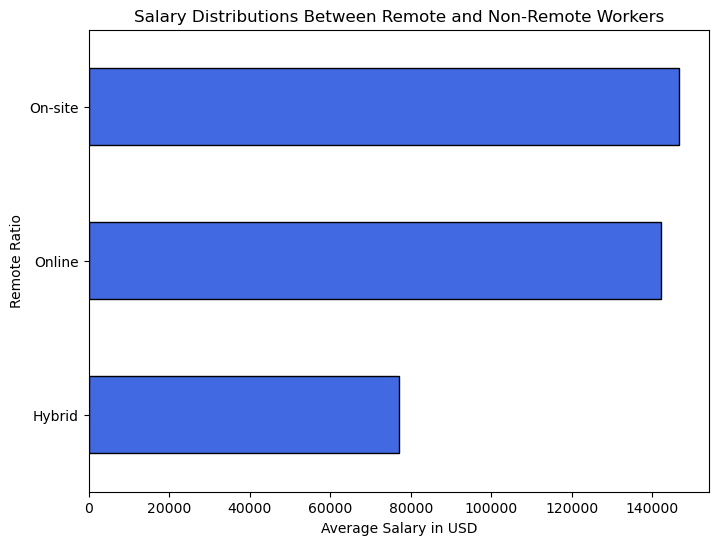

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('new_dataframe.csv')

country_salary = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
country_salary = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=True)  # Sort in ascending order
country_salary.plot(kind='barh', figsize=(8, 6), color='royalblue', edgecolor='black')
plt.title('Salary Distributions Between Remote and Non-Remote Workers')
plt.ylabel('Remote Ratio')  # Y-axis now represents the categories
plt.xlabel('Average Salary in USD')  # X-axis represents the salary values
plt.show()




#    Hypothesis 3: Larger companies (size L) offer higher average salaries in USD for data-related roles compared to medium (M) and small (S) companies, across all experience levels.
***Solution:*** We will plot a box plot  for company sizeover salary.

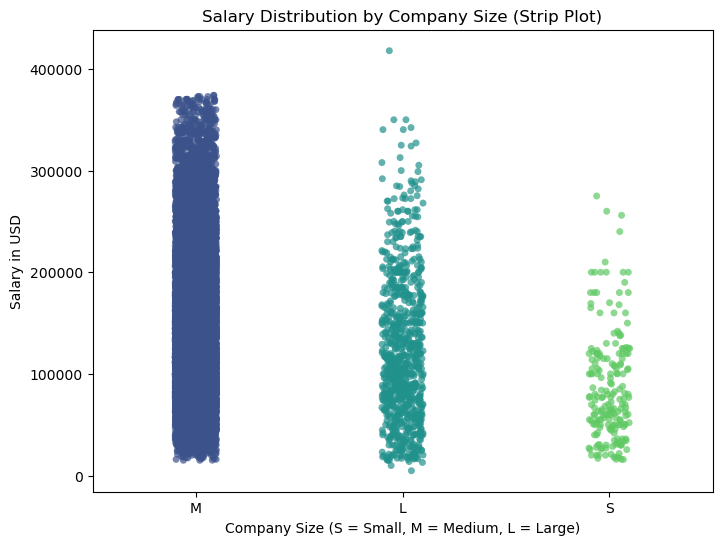

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('new_dataframe.csv')

# Create a strip plot comparing salary by company size
plt.figure(figsize=(8, 6))
sns.stripplot(x='company_size', y='salary_in_usd', data=df, jitter=True, hue='company_size', 
              palette='viridis', alpha=0.7, legend=False)

plt.title('Salary Distribution by Company Size (Strip Plot)')
plt.xlabel('Company Size (S = Small, M = Medium, L = Large)')
plt.ylabel('Salary in USD')
plt.show()


# Hypothesis 4: The salary distribution of data-related roles differs significantly across continents, with certain continents (e.g., North America and Europe) offering higher average salaries compared to others (e.g., Asia).
***Solution:*** We will plot a kdeplot for Salary Distribution by Continent .

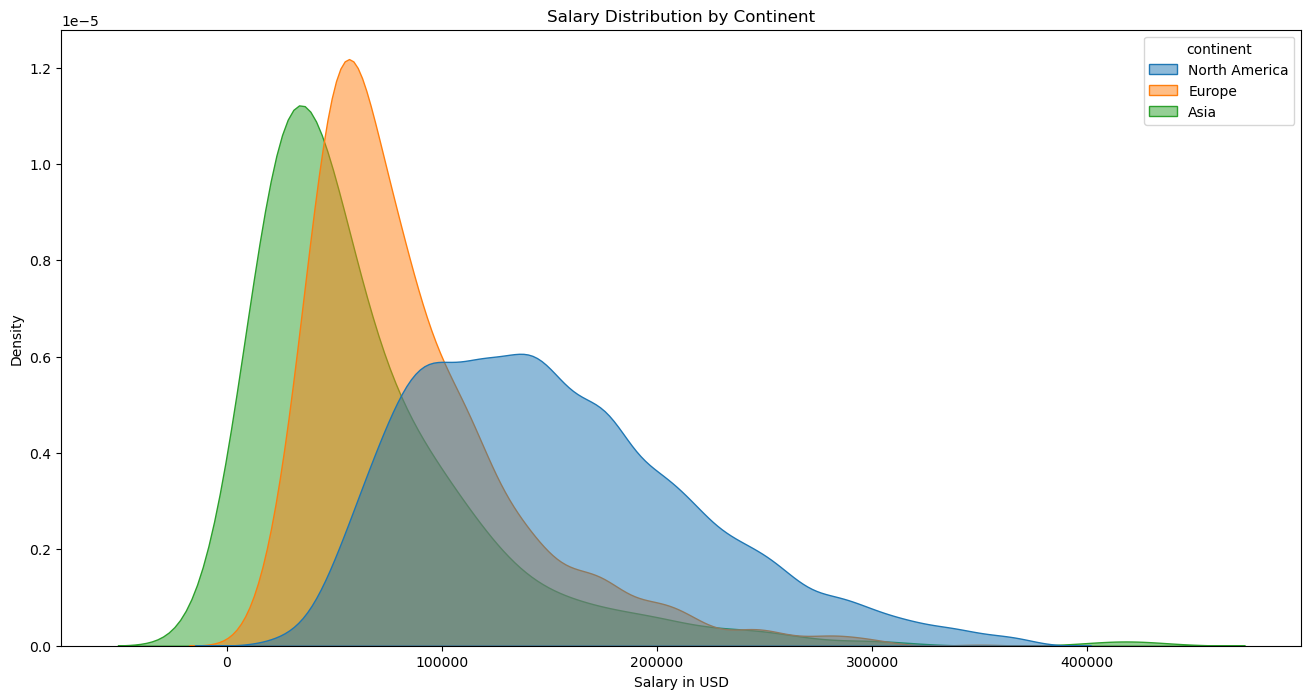

In [55]:
country_to_continent = {
    "Canada": "North America",
    "United States of America": "North America",
    "Mexico": "North America",
    "El Salvador": "North America",
    "Costa Rica": "North America",
    "Honduras": "North America",
    "Bermuda": "North America",
    "Puerto Rico": "North America",
   
    "Turkey": "Asia",
    "Armenia": "Asia",
    "Philippines": "Asia",
    "Russian Federation": "Asia",
    "India": "Asia",
    "Pakistan": "Asia",
    "Hong Kong": "Asia",
    "Israel": "Asia",
    "Japan": "Asia",
    "Singapore": "Asia",
    "Thailand": "Asia",
    "Korea, Republic of": "Asia",
    "Lebanon": "Asia",
    "Viet Nam": "Asia",
    "Georgia": "Asia",
    "United Arab Emirates": "Asia",
    "Saudi Arabia": "Asia",
    "Oman": "Asia",
    "Qatar": "Asia",
    "Uzbekistan": "Asia",
    "Kuwait": "Asia",
    "Iran (Islamic Republic of)": "Asia",
    "China": "Asia",
    "Indonesia": "Asia",
    "Malaysia": "Asia",
    "Iraq": "Asia",
   
    "United Kingdom of Great Britain and Northern Ireland": "Europe",
    "Switzerland": "Europe",
    "Finland": "Europe",
    "Czechia": "Europe",
    "Denmark": "Europe",
    "France": "Europe",
    "Greece": "Europe",
    "Austria": "Europe",
    "Spain": "Europe",
    "Slovakia": "Europe",
    "Lithuania": "Europe",
    "Netherlands": "Europe",
    "Latvia": "Europe",
    "Germany": "Europe",
    "Ireland": "Europe",
    "Belgium": "Europe",
    "Cyprus": "Europe",
    "Italy": "Europe",
    "Poland": "Europe",
    "Bulgaria": "Europe",
    "Portugal": "Europe",
    "Croatia": "Europe",
    "Luxembourg": "Europe",
    "Sweden": "Europe",
    "Romania": "Europe",
    "Estonia": "Europe",
    "Slovenia": "Europe",
    "Andorra": "Europe",
    "Serbia": "Europe",
    "Malta": "Europe",
    "Hungary": "Europe",
    "Norway": "Europe",
    "Ukraine": "Europe",
    "Bosnia and Herzegovina": "Europe",
    "Moldova, Republic of": "Europe",
    "Jersey": "Europe"
}


import seaborn as sns
import matplotlib.pyplot as plt

# Map the 'employee_country' to continents
df['continent'] = df['employee_country'].map(country_to_continent)

# Set up the figure size
plt.figure(figsize=(16, 8))

# Create the density plot for the continents
sns.kdeplot(data=df, x='salary_in_usd', hue='continent', common_norm=False, fill=True, alpha=0.5)

# Set the title and labels
plt.title('Salary Distribution by Continent')
plt.xlabel('Salary in USD')
plt.ylabel('Density')

# Display the plot
plt.show()

# Hypothesis 5: High-demand roles such as Data Scientist,Data Engineer,Software Engineer, Machine Learning Engineer, receive higher total salary compared  to Associate,Research Engineer,Data Archlied ,Applied Scientist.
***Solution:*** We will plot a pie chart for top 15 jobs, comparing salary distribution across different job titles.

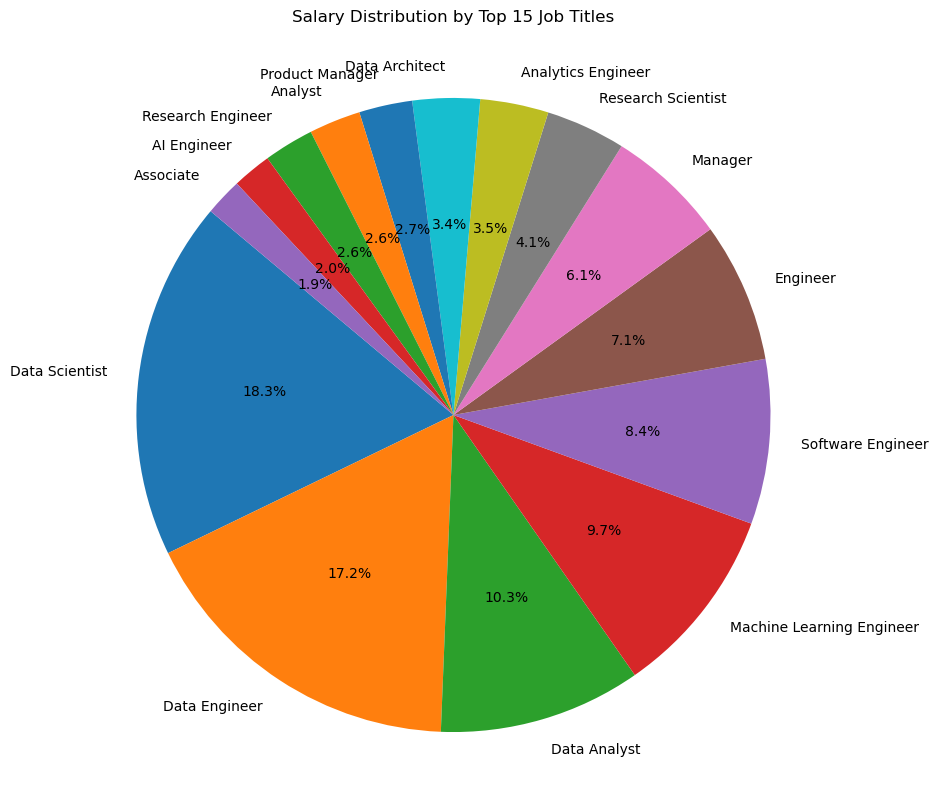

In [79]:

salary_by_job_title = df.groupby('job_title')['salary_in_usd'].sum()
salary_by_job_title = salary_by_job_title.sort_values(ascending=False)
top_n = 15  
top_salary_by_job_title = salary_by_job_title.head(top_n)
plt.figure(figsize=(9,10))
plt.pie(top_salary_by_job_title, labels=top_salary_by_job_title.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Salary Distribution by Top {top_n} Job Titles')
plt.axis('equal')
plt.show()


# Hypothesis 6: The average salary for Data Scientists roles has shown a steady increase over the years, with a significant jump between 2021 and 2024. This suggests growing demand and valuation of data science skills in the job market
***Solution:*** We will plot a line chart for years and salary of data scientists.

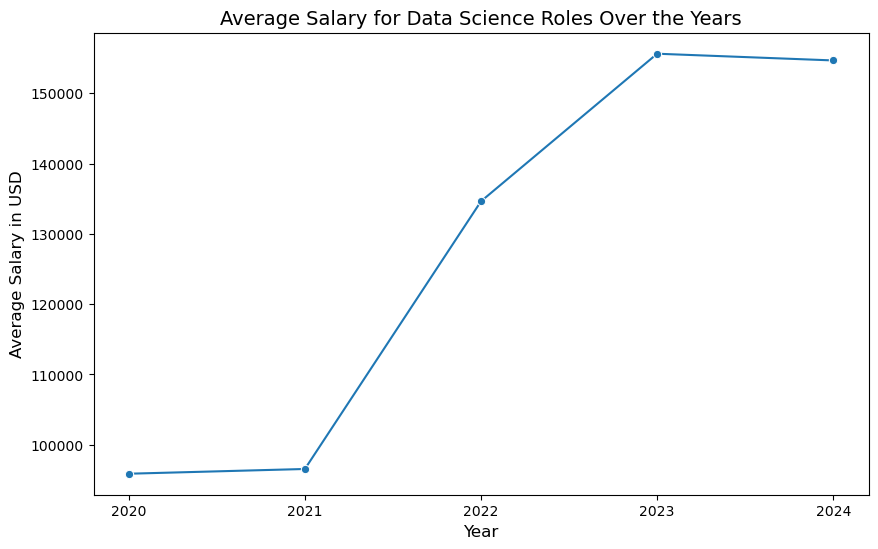

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter data for Data Scientists
data_science_titles = [
    'Data Scientist', 'Machine Learning Engineer', 'AI Scientist', 'Applied Data Scientist',
    'Data Engineer', 'Machine Learning Specialist', 'Research Analyst', 'AI Data Scientist',
    'Analytics Engineer', 'Data Developer', 'Data Visualization Engineer', 'Applied Scientist',
    'AI Research Scientist', 'Machine Learning Research Engineer', 'Data Architect',
    'Machine Learning Scientist', 'Deep Learning Engineer', 'Staff Data Analyst', 'Data Manager',
    'Lead Data Engineer', 'Machine Learning Developer', 'Machine Learning Manager', 'Research Scientist',
    'Big Data Architect', 'Data DevOps Engineer', 'Lead Machine Learning Engineer',
    'Applied Machine Learning Scientist', 'Principal Data Engineer', 'Data Analytics Engineer',
    'Data Scientist Lead', 'Applied Machine Learning Engineer', 'Deep Learning Researcher',
    'Data Management Specialist', 'Data Analytics Manager', 'Data Governance Lead',
    'Data Analytics Lead', 'Data Modeler', 'Data Platform Engineer', 'Data Integration Developer',
    'Data Analytics Consultant', 'Machine Learning Architect', 'Data Operations Lead',
    'Machine Learning Quality Engineer', 'Machine Learning Model Engineer', 'DataOps Engineer',
    'Machine Learning Platform Engineer', 'Applied AI ML Lead', 'Data Product Analyst',
    'Data Analytics Team Lead', 'Machine Learning Modeler', 'Data Pipeline Engineer',
    'Staff Machine Learning Engineer', 'Staff Data Scientist', 'AWS Data Architect', 'Data Analyst Lead',
    'Marketing Data Scientist'
]

df_data_science = df[df['job_title'].isin(data_science_titles)]

# Group by year and calculate the average salary
avg_salary_by_year = df_data_science.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Ensure 'year' is an integer for whole number representation
avg_salary_by_year['work_year'] = avg_salary_by_year['work_year'].astype(int)

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_salary_by_year, x='work_year', y='salary_in_usd', marker='o')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# Set the title and labels
plt.title('Average Salary for Data Science Roles Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

# Display the plot
plt.show()

# Hypothesis 7:Employees in countries where the company is headquartered (company_location = employee_residence) tend to earn higher salaries than employees working for foreign-based companies.

***Solution:We will compare salary distributions for employees working in their company's home country vs. those working for foreign companies using a box plot.*** 

C:\Users\Msi GL65\AppData\Local\Temp\ipykernel_39880\853940597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employment_type', y='salary_in_usd', data=df, palette=['blue', 'orange'])


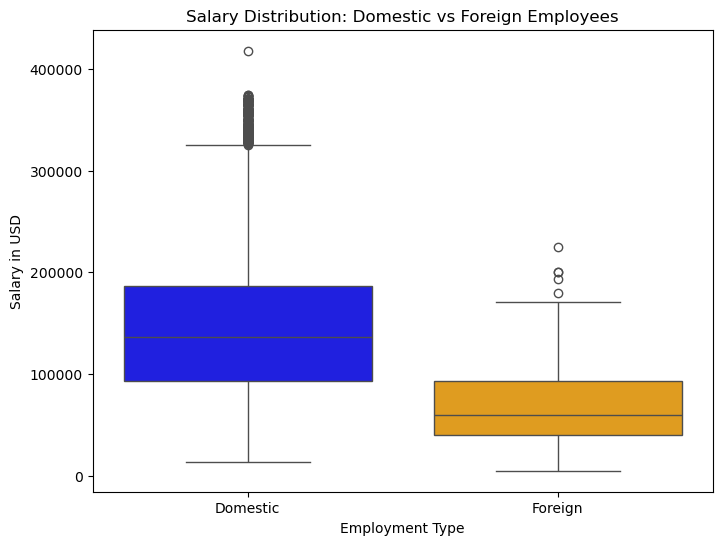

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('new_dataframe.csv')

# Create a new column to classify employees as Domestic or Foreign
df['employment_type'] = df.apply(lambda row: 'Domestic' if row['employee_residence'] == row['company_location'] else 'Foreign', axis=1)

# Plot the salary distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, palette=['blue', 'orange'])

# Set plot labels and title
plt.title('Salary Distribution: Domestic vs Foreign Employees')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')

# Show the plot
plt.show()


 # Hypothesis 8: The average salaries in USD for employees earning in stronger currencies (USD, EUR, GBP) earn more salaries compared to employees working in regions with  weaker currencies

C:\Users\Msi GL65\AppData\Local\Temp\ipykernel_39880\2154942452.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='currency_strength', y='salary_in_usd', data=df, palette=['blue', 'green'])


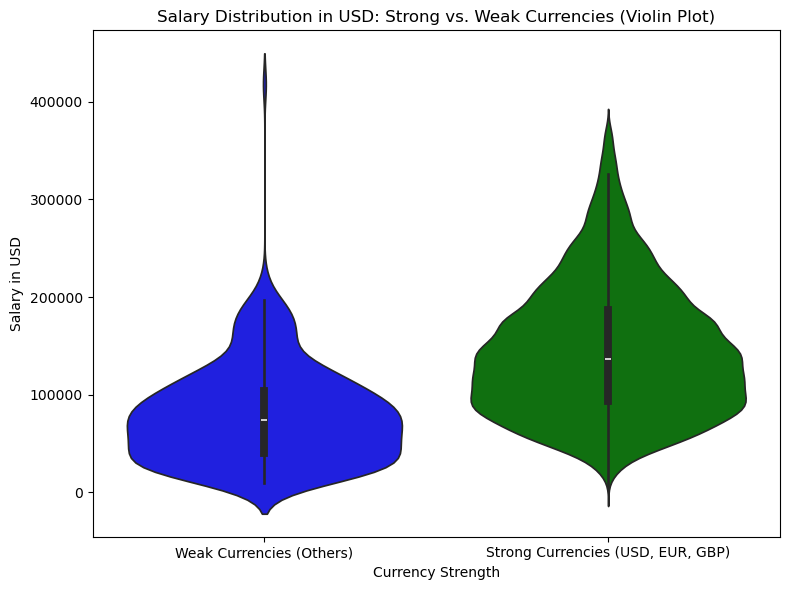

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('new_dataframe.csv')

# Define strong and weak currencies based on global valuation
strong_currencies = ['USD', 'EUR', 'GBP']
df['currency_strength'] = df['salary_currency'].apply(lambda x: 'Strong Currencies (USD, EUR, GBP)' if x in strong_currencies else 'Weak Currencies (Others)')

# Plot the salary distribution using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='currency_strength', y='salary_in_usd', data=df, palette=['blue', 'green'])

# Set plot labels and title
plt.title('Salary Distribution in USD: Strong vs. Weak Currencies (Violin Plot)')
plt.xlabel('Currency Strength')
plt.ylabel('Salary in USD')

# Show the plot
plt.tight_layout()
plt.show()


 # Hypothesis 9: Specialized technical roles, like Machine Learning Engineers or AI Scientist, earn more than generalist roles, such as Data Analysts or Software Developer, even if the specialized role has less experience.

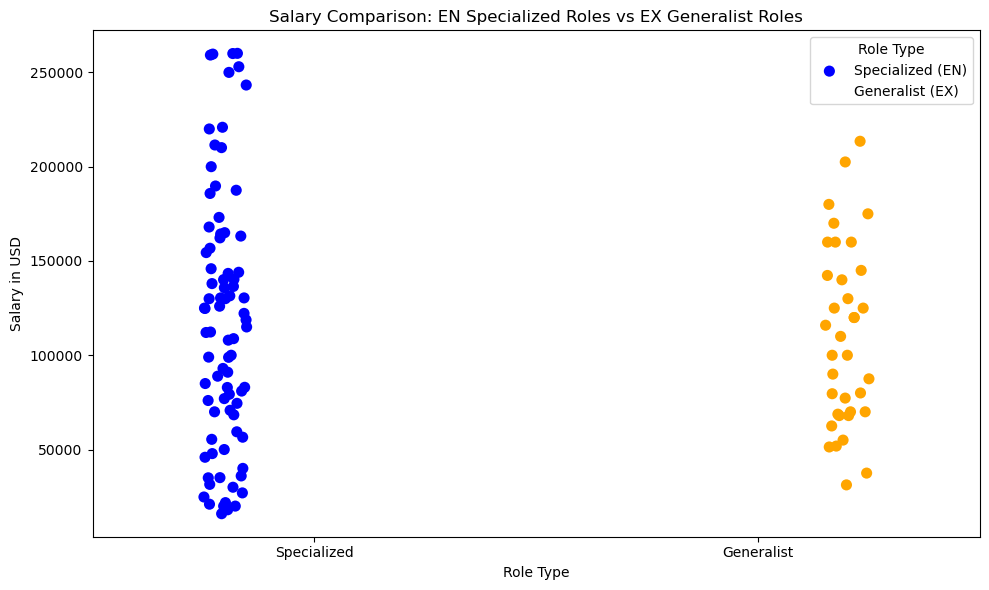

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('new_dataframe.csv')

# Define job titles for specialized and generalist roles
specialized_roles = ['Machine Learning Engineer', 'AI Scientist']
generalist_roles = ['Data Analyst', 'Software Developer']

# Create a new column 'role_type' to classify roles
df['role_type'] = df['job_title'].apply(lambda x: 'Specialized' if x in specialized_roles else 'Generalist')

# Filter the dataset to include:
# - Specialized roles with experience level 'EN'
# - Generalist roles with experience level 'EX'
df_filtered = df[((df['job_title'].isin(specialized_roles)) & (df['experience_level'] == 'EN')) |
                 ((df['job_title'].isin(generalist_roles)) & (df['experience_level'] == 'EX'))]

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a strip plot for the filtered data
sns.stripplot(x='role_type', y='salary_in_usd', data=df_filtered, hue='role_type', palette=['blue', 'orange'], jitter=True, dodge=True, size=8)

# Set plot labels and a concise title
plt.title('Salary Comparison: EN Specialized Roles vs EX Generalist Roles')
plt.xlabel('Role Type')
plt.ylabel('Salary in USD')

# Adjust the legend
plt.legend(title='Role Type', loc='upper right', labels=['Specialized (EN)', 'Generalist (EX)'])

# Show the plot
plt.tight_layout()
plt.show()


***specialized_roles - Machine Learning Engineer,AI Scientist***
***generalist_roles  - Data Analyst,Software Developer***

# Conclusion:  

Our analysis confirms several significant salary trends in the data industry. Experience plays a critical role, with senior and executive-level professionals earning substantially higher salaries than entry and mid-level employees. Similarly, company size influences compensation, with medium organizations offering higher average salaries then compared to larger. Work environment also impacts earnings, as onsite and online employees tend to earn more than those in hybrid roles.<br>

Additionally, salaries vary across continents, with Europe offering higher average salaries compared to   North America and Asia, reflecting regional economic conditions and industry demand. Certain high-demand roles, such as Data Scientists and Machine Learning Engineers, receive higher salaries than research-focused and associate roles. Finally, the steady increase in Data Scientist salaries from 2021 to 2024 highlights the growing demand for data expertise in the job market.These insights can help employers optimize salary structures, guide professionals in career planning, and offer a deeper understanding of how different factors contribute to salary variations in the data-driven industry.